In [1]:
### Diabetes Health Indicator Dataset
# https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators



import pandas as pd

# Load the first few rows to inspect the file structure
#df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv', delimiter=',', header=0,nrows=253680)  # Adjust delimiter as needed
df = pd.read_table('diabetes_binary_health_indicators_BRFSS2015.csv', delimiter=',', header=0)
print(df.head())
print(df.columns)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#  'df' is your DataFrame after loading the Excel file
#df = pd.read_table('wdbc.data', delimiter=',', header=None)  # Use '\s+' for spaces, and \t for tabular data

# Separate features and target

X = df.drop(columns=df.columns[[0, 18, 19, 20, 21]])
y = df[df.columns[0]] 


# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Train the model
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, batch_size=21)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10
7732/7732 [==============================] - 6s 805us/step - loss: 0.3282 - accuracy: 0.8623 - val_loss: 0.3217 - val_accuracy: 0.8655
Epoch 2/10
7732/7732 [==============================] - 6s 794us/step - loss: 0.3231 - accuracy: 0.8645 - val_loss: 0.3213 - val_accuracy: 0.8652
Epoch 3/10
7732/7732 [==============================] - 6s 790us/step - loss: 0.3222 - accuracy: 0.8650 - val_loss: 0.3205 - val_accuracy: 0.8658
Epoch 4/10
7732/7732 [==============================] - 6s 787us/step - loss: 0.3219 - accuracy: 0.8651 - val_loss: 0.3202 - val_accuracy: 0.8659
Epoch 5/10
7732/7732 [==============================] - 6s 788us/step - loss: 0.3215 - accuracy: 0.8652 - val_loss: 0.3237 - val_accuracy: 0.8656
Epoch 6/10
7732/7732 [==============================] - 6s 802us/step - loss: 0.3214 - accuracy: 0.8654 - val_loss: 0.3196 - val_accuracy: 0.8653
Epoch 7/10
7732/7732 [==============================] - 6s 806us/step - loss: 0.3210 - accuracy: 0.8657 - val_loss: 0.3201 -

In [3]:
# Using Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load your data into 'df'

# Separate features and target
X = df.drop(columns=df.columns[[0, 18, 19, 20, 21]])
y = df[df.columns[0]] 

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

# Fit the model to the training data
tree_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = tree_classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [5]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_table('diabetes_binary_health_indicators_BRFSS2015.csv', delimiter=',', header=0)

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

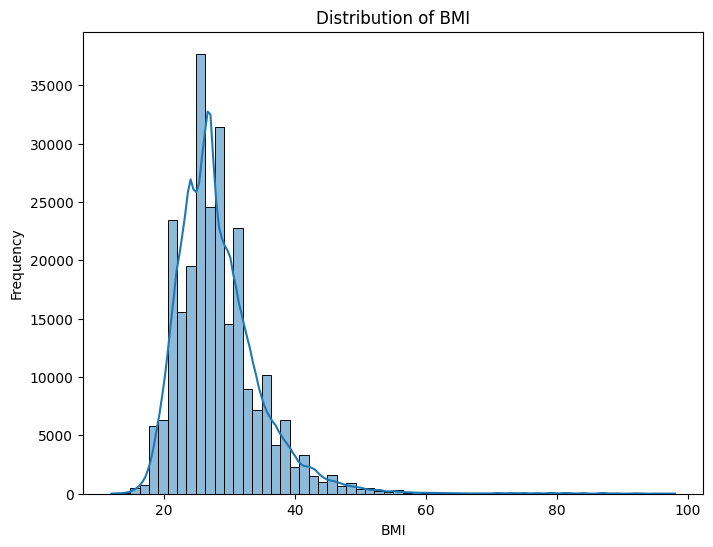

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of BMI
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=60, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Example: Calculate the probability of having high blood pressure (HighBP)
prob_high_bp = df['HighBP'].mean()
print('Probability of having high blood pressure:', prob_high_bp)

# Example: Calculate conditional probabilities
# Probability of having high cholesterol given high blood pressure
prob_high_chol_given_high_bp = df[df['HighBP'] == 1]['HighChol'].mean()
print('Conditional probability of high cholesterol given high blood pressure:', prob_high_chol_given_high_bp)

Probability of having high blood pressure: 0.4290011037527594
Conditional probability of high cholesterol given high blood pressure: 0.5941431052384935


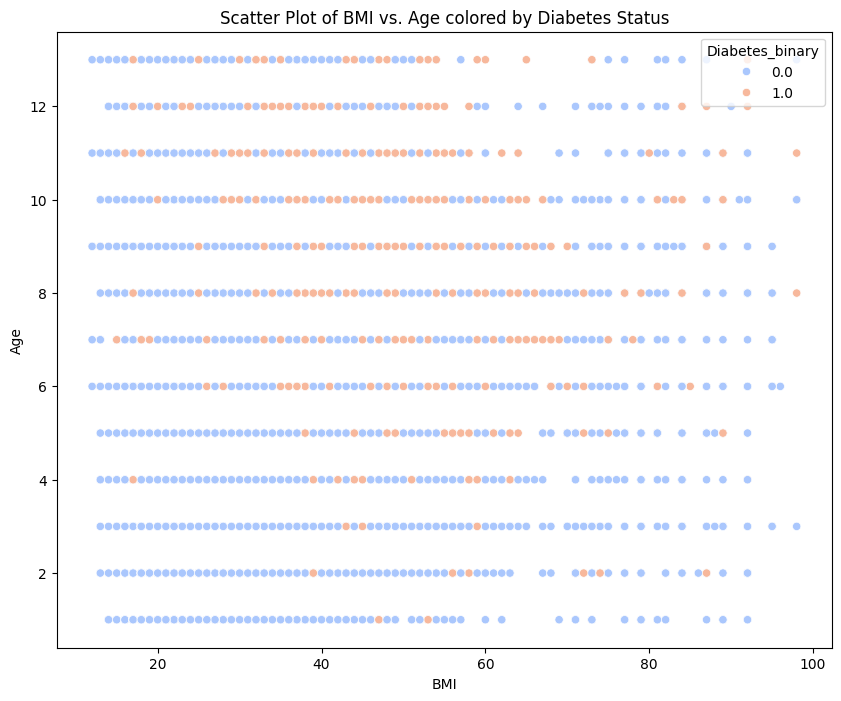

In [9]:
# Example: Scatter plot of BMI vs. Age colored by diabetes status
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BMI', y='Age', hue='Diabetes_binary', data=df, palette='coolwarm')
plt.title('Scatter Plot of BMI vs. Age colored by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()
